In [560]:
import pandas as pd
messages=pd.read_csv('/Users/jyothikumargoud/Documents/SMSSpamCollection 2.csv',
                    sep='\t',names=["label","message"])

In [562]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [564]:
messages.shape

(5572, 2)

In [566]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [570]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [572]:
for i in messages.columns:
    print(df[i].isnull().sum())

0
0


In [574]:
for i in messages.columns:
    print(df[i].unique())

['ham' 'spam']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...' 'Ok lar... Joking wif u oni...' "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's" 'U dun say so early hor... U c already then say...' "Nah I don't think he goes to usf, he lives around here though" "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv" 'Even my brother is not like to speak with me. They treat me like aids patent.' "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune" 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.' 'Had your m

In [578]:
messages['label'].unique()

array(['ham', 'spam'], dtype=object)

In [580]:
#data cleaning and pre processing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jyothikumargoud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [581]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [584]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [585]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [586]:
X = corpus

Create Bag of Words

In [588]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:,0].values

In [589]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(4457, 1115, 4457, 1115)

In [590]:
#create a bow model 
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500,ngram_range=(1,2))

In [591]:
X_train=tv.fit_transform(X_train).toarray()
X_test=tv.transform(X_test).toarray()

In [592]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))


In [593]:
X_train

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

In [594]:
y_train

array([False,  True,  True,  True, False,  True,  True, False,  True,  True,  True,  True,  True,  True,  True, False,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, ...,  True,  True, False,  True, False,  True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True])

In [595]:
cv.vocabulary_

{'repli': 1717,
 'win': 2398,
 'weekli': 2372,
 'world': 2433,
 'cup': 456,
 'send': 1820,
 'stop': 1988,
 'end': 589,
 'servic': 1836,
 'send stop': 1826,
 'stop end': 1990,
 'hello': 910,
 'sort': 1939,
 'town': 2176,
 'alreadi': 48,
 'dont': 543,
 'rush': 1763,
 'home': 946,
 'eat': 576,
 'let': 1139,
 'know': 1083,
 'let know': 1141,
 'come': 380,
 'go': 788,
 'tell': 2066,
 'told': 2153,
 'hey': 913,
 'till': 2130,
 'dint': 526,
 'meet': 1273,
 'even': 614,
 'singl': 1880,
 'time': 2131,
 'saw': 1784,
 'situat': 1888,
 'orang': 1497,
 'bring': 213,
 'rington': 1743,
 'free': 706,
 'hit': 927,
 'week': 2363,
 'pic': 1557,
 'wap': 2340,
 'receiv': 1694,
 'repli stop': 1722,
 'sit': 1886,
 'mu': 1366,
 'wait': 2318,
 'everyon': 622,
 'get': 760,
 'suit': 2017,
 'take': 2045,
 'shower': 1864,
 'finish': 679,
 'liao': 1143,
 'urgent': 2268,
 'mobil': 1320,
 'award': 118,
 'bonu': 189,
 'caller': 268,
 'prize': 1637,
 'nd': 1388,
 'attempt': 107,
 'contact': 408,
 'call': 239,
 'box': 2

In [596]:
#model building
from sklearn.svm import SVC

model = SVC().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [597]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [598]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       1.00      0.88      0.94       149
        True       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [599]:
print(accuracy_score(y_test,y_pred))

0.9838565022421525


In [600]:
print(confusion_matrix(y_test,y_pred))

[[131  18]
 [  0 966]]


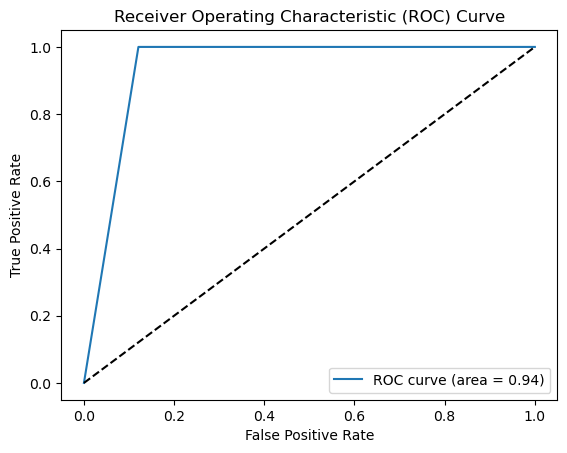

In [601]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have y_true (true labels) and y_prob (predicted probabilities)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()